<a href="https://colab.research.google.com/github/KatiaItzelCortes/EDP/blob/main/Membrana%20vibratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [12]:
sp.init_printing()
x, y, t, m, n = sp.symbols('x y t m n', real=True)
a, b, c = 4, 2, 1  # Dimensiones del rectángulo y velocidad

Definir símbolos y parámetros

In [13]:
omega_mn = sp.pi * c * sp.sqrt((m/a)**2 + (n/b)**2)
u_mn = sp.Function('A')(m, n) * sp.cos(omega_mn * t) * sp.sin(m * sp.pi * x / a) * sp.sin(n * sp.pi * y / b)

print("🔹 Solución general u(x, y, t):")
display(sp.Eq(sp.Symbol('u(x,y,t)'), sp.Sum(sp.Sum(u_mn, (n, 1, sp.oo)), (m, 1, sp.oo))))


🔹 Solución general u(x, y, t):


             ∞     ∞                                                        
           _____ _____                                                      
           ╲     ╲                                                          
            ╲     ╲                                                         
             ╲     ╲                                    ⎛         _________⎞
              ╲     ╲                                   ⎜        ╱  2    2 ⎟
u(x,y,t) =    ╱     ╱             ⎛π⋅m⋅x⎞    ⎛π⋅n⋅y⎞    ⎜       ╱  m    n  ⎟
             ╱     ╱   A(m, n)⋅sin⎜─────⎟⋅sin⎜─────⎟⋅cos⎜π⋅t⋅  ╱   ── + ── ⎟
            ╱     ╱               ⎝  4  ⎠    ⎝  2  ⎠    ⎝    ╲╱    16   4  ⎠
           ╱     ╱                                                          
           ‾‾‾‾‾ ‾‾‾‾‾                                                      
           m = 1 n = 1                                                      

Solución general de la ecuación de onda

In [14]:
f_xy = 0.1 * (4*x - x**2) * (2*y - y**2)  # desplazamiento inicial
phi_mn = sp.sin(m * sp.pi * x / a) * sp.sin(n * sp.pi * y / b)

# Cálculo de A_mn
A_mn_expr = (4 / (a * b)) * sp.integrate(
    sp.integrate(f_xy * phi_mn, (x, 0, a)),
    (y, 0, b)
)
A_mn_expr = sp.simplify(A_mn_expr)
print("🔹 Coeficiente A_mn:")
display(sp.Eq(sp.Function('A')(m, n), A_mn_expr))

🔹 Coeficiente A_mn:


          ⎧-51.2⋅π⋅m⋅sin(π⋅m) - 51.2⋅π⋅n⋅sin(π⋅n) + 4.0⋅(6.4⋅π⋅m⋅sin(π⋅m) + 12 ↪
          ⎪─────────────────────────────────────────────────────────────────── ↪
          ⎪                                                                    ↪
A(m, n) = ⎨                                                                    ↪
          ⎪                                                                    ↪
          ⎪                                                                    ↪
          ⎩                                                                    ↪

↪ .8⋅cos(π⋅m))⋅(π⋅n⋅sin(π⋅n) + 2⋅cos(π⋅n)) - 102.4⋅cos(π⋅m) - 102.4⋅cos(π⋅n) + ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪     6  3  3                                                                  ↪
↪    π ⋅m ⋅n                                                                   ↪
↪                                                                              ↪
↪        0                 

Condiciones iniciales

In [15]:
A_mn_func = sp.lambdify((m, n), A_mn_expr, 'numpy')

Convertir A_mn a función numérica

In [16]:
def u_aproximada(x_vals, y_vals, t_val, M=5, N=5):
    u_val = np.zeros((len(y_vals), len(x_vals)))
    for mi in range(1, M+1):
        for ni in range(1, N+1):
            A = A_mn_func(mi, ni)
            omega = np.pi * c * np.sqrt((mi/a)**2 + (ni/b)**2)
            Xm = np.sin(mi * np.pi * x_vals[:, None] / a)
            Yn = np.sin(ni * np.pi * y_vals[None, :] / b)
            T = np.cos(omega * t_val)
            u_val += A * T * np.outer(Yn, Xm)
    return u_val.T  # trasponer para que el eje y esté en la dirección correcta

Aproximación numérica usando los primeros MxN términos

In [17]:
x_vals = np.linspace(0, a, 80)
y_vals = np.linspace(0, b, 40)
t_val = 0  # instante de tiempo
u_vals = u_aproximada(x_vals, y_vals, t_val, M=10, N=10)

Evaluar la solución aproximada. Crea una malla de puntos en la región rectangular para calcular y graficar u(x,y,t).

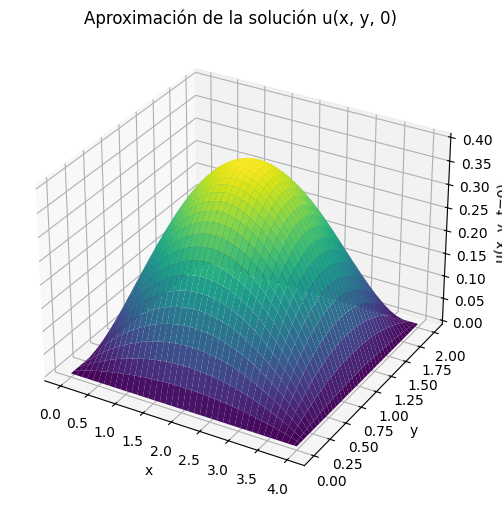

In [18]:
X, Y = np.meshgrid(x_vals, y_vals)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u_vals.T, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y, t=0)')
ax.set_title('Aproximación de la solución u(x, y, 0)')
plt.show()

Graficar solución aproximada u(x, y, 0)